# Proyecto 2: Modelo de predicción Naive Bayes
|      Nombre     | Carnet |
|:---------------:|:------:|
| André Rodríguez |  18332 |
|   Cesar Rodas   |  16776 |
|  Javier Ramirez |  18099 |
|  Abril Palencia |  18198 |

## Importación de librerías

In [101]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

## Carga de archivos

Se carga el archivo clean_data.csv, el cual se encuentra ya procesado y contiene la siguiente informacion:
- text: texto del tweet preprocesado
- target: 1 (Tweet de desastre) o 0 (tweet de no desastre)

In [1]:
data = pd.read_csv("../clean_data.csv")

df_non_emergency = data[data['target']==0]
df_emergency = data[data['target']==1]

df_emergency

NameError: name 'pd' is not defined

Debido a que se tiene más tweets de no emergencia que de emergencia, se iguala la cantidad de ambos conjuntos con el fin de mejorar la precisión del modelo de predicción.

In [103]:
non_emergency_X, non_emergency_Y = df_non_emergency.text.sample(3271).fillna(' '), df_non_emergency.target.sample(3271).fillna(int(0))

emergency_X, emergency_Y = df_emergency.text.fillna(' '), df_emergency.target.fillna(int(0))

non_emergency_X = non_emergency_X.to_numpy()
emergency_X = emergency_X.to_numpy()

non_emergency_Y = non_emergency_Y.to_numpy()
emergency_Y = emergency_Y.to_numpy()

## Modelo de clasificacion

Separacion de datos de entrenamiento y prueba para el modelo de clasificacion. Se necesitó el 80% del dataset para entrenar el modelo para que tuviera una buena precisión.

In [120]:
X_train = np.concatenate((non_emergency_X[:int(len(non_emergency_X)*0.8)],
                          emergency_X[:int(len(emergency_X)*0.8)]))
X_test = np.concatenate((non_emergency_X[int(len(non_emergency_X)*0.7):],
                         emergency_X[int(len(emergency_X)*0.7):]))

Y_train = np.concatenate((non_emergency_Y[:int(len(non_emergency_Y)*0.8)],
                          emergency_Y[:int(len(emergency_Y)*0.8)]))
Y_test = np.concatenate((non_emergency_Y[int(len(non_emergency_Y)*0.7):],
                         emergency_Y[int(len(emergency_Y)*0.7):]))

Entrenamiento del modelo de predicción utilizando Naive Bayes.

In [121]:
model = make_pipeline(TfidfVectorizer(binary=True),MultinomialNB())
model.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Heatmap sobre el resultado del modelo de predicción sobre el conjunto de prueba.

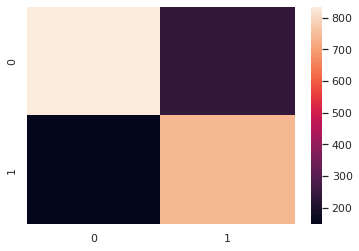

In [122]:
labels = model.predict(X_test)

mat = confusion_matrix(Y_test,labels)

sns.heatmap(mat.T)

In [146]:
# Función para predecir la categoría a la que pertenecería un string
def predict_category(s,train=Y_train,model=model):
  pred=model.predict([s])
  print("Prediction: "+str(pred[0]))
  print("\tDisaster Tweet") if pred[0] == 1 else print("\tNon Disaster Tweet")

Predicción de un string cualquiera.

In [152]:
predict_category("Fire")

Prediction: 1
	Disaster Tweet
